# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">5. Level 2 Binary Classification</h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546    |

---

### **5. Level 2 Binary Classification Notebook**
**Description:**
This notebook focuses on the **Level 2 Binary Classification model**, which distinguishes between the two most common classes identified in Level 1:
- **2 - NON-COMP**
- **4 - TEMPORARY**

Key steps include:
- Loading the subset of **“Common”** cases from Level 1 predictions.
- **Feature selection:** Tailor feature preprocessing and selection for this binary classification task.
- **Model training:** Train and evaluate a binary classification model to distinguish between the two classes.
- **Evaluation:** Use metrics like accuracy, precision, recall, and F1-score to measure performance.
- **Output:** Save predictions for integration in the final notebook.

This notebook refines the classification of cases within the most common classes, contributing to the pipeline's accuracy.

---


<a id = "toc"></a>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Load and Prepare Datasets](#chapter2)
* [3. Setting the Target](#chapter3)
* [4. Feature Selection](#chapter4)
    * [4.1. Preparing the Data](#section_4_1)  
    * [4.2. Numerical Features](#section_4_2) 
        * [4.2.1. LASSO Regression](#section_4_2_1)
        * [4.2.2. Recursive Feature Elimination - RFE](#section_4_2_2)
        * [4.2.3. Feature Importance - Decision Tree](#section_4_2_3)
        * [4.2.4. Feature Importance - Random Forest](#section_4_2_4)
    * [4.3. Categorical Features](#section_4_3)
        * [4.3.1. $\chi ^2$ Test for Independence](#section_4_3_1)
        * [4.3.2. Mutual Information Criterion (MIC)](#section_4_3_2)
    * [4.4. Final Features](#section_4_4)
* [5. Modelling](#chapter5)
  * [5.1. Logistic Regression](#section_5_1)
  * [5.2. Random Forest Trees](#section_5_2)
  * [5.3. Decision Trees](#section_5_3)
  * [5.4. Gradient Boosting](#section_5_4)
  * [5.5. Summary of Models](#section_5_5)
* [6. Loading the results](#chapter6)


# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>
[Back to ToC](#toc)<br>

In [69]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile


# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# --- Feature Selection Methods ---
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#from xgboost import XGBClassifier

# --- Warnings ---

import warnings
warnings.filterwarnings('ignore')


#Import from utils the used functions
from utils import plot_importance, cor_heatmap, find_optimal_features_with_rfe, compare_rf_feature_importances,compare_feature_importances, select_high_score_features_chi2_no_model,select_high_score_features_MIC, metrics

#Modeling 
from sklearn.ensemble import RandomForestClassifier

In this topic we will also import the pre-saved feature categories dictionary from Notebook 3, ensuring consistency in feature grouping for feature selection and modeling.

In [ ]:
# Load the feature categories dictionary
feature_categories_file = "feature_categories.pkl"
with open(feature_categories_file, "rb") as file:
    feature_categories = pickle.load(file)

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
[Back to ToC](#toc)<br>

Now that we preprocessed the dataset in notebook 3. we will upload those datasets

In [70]:
#Import the datasets
X_train = pd.read_csv("../processed_datasets/X_train_model.csv", index_col="Claim Identifier")
X_val = pd.read_csv("../processed_datasets/X_val_model.csv", index_col="Claim Identifier")
df_test = pd.read_csv("../Data_Temporary/df_test_predictions_not4.csv", index_col="Claim Identifier")

Let's open the dataset.

In [71]:
X_train.head(3)

,Unnamed: 0,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Category Combination,Carrier_District_Interaction,Income_Category,Days_To_First_Hearing,Accident_Quarter,Accident_Year,Accident Day,Accident on Weekend,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,0,24.0,0.0,816.0,1996.0,STATE INSURANCE FUND,SIF,CAYUGA,0.0,SYRACUSE,M,0.0,11.0,I,53.0,52.0,55.0,13143.0,3.0,SIF-M,SIF_SYRACUSE,Lower-Middle Income,0,2,2020,1,0,Youth,Until 1 week,Until 1 week,Form Not Received,OTHER,SIF,STATE INSURANCE FUND,Lower Extremities,Specific Injury,Strain or Injury By,High Risk,204.000000
6023025,1,36.0,1.0,1097.0,1986.0,SIRIUSPOINT AMERICA INSURANCE,PRIVATE,QUEENS,0.0,NYC,M,4.0,31.0,IV,31.0,10.0,65.0,11368.0,2.0,PRIVATE-M,PRIVATE_NYC,Middle Income,111,2,2022,1,0,Young Adult,1 to 3 months,1 to 3 months,1 to 3 months,11368.0,PRIVATE,OTHER,Multiple Body Parts,Specific Injury,"Fall, Slip, or Trip",High Risk,365.666667
5851908,2,41.0,1.0,623.0,1980.0,INDEMNITY INS. OF N AMERICA,PRIVATE,MONROE,0.0,ROCHESTER,F,2.0,33.0,I,56.0,52.0,38.0,14580.0,3.0,PRIVATE-F,PRIVATE_ROCHESTER,Low Income,674,2,2021,2,0,Young Adult,3 to 6 months,3 to 6 months,3 to 6 months,OTHER,PRIVATE,INDEMNITY INS. OF N AMERICA,Upper Extremities,Specific Injury,Strain or Injury By,High Risk,155.750000


In [72]:
X_val.head(3)

,Unnamed: 0,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Category Combination,Carrier_District_Interaction,Income_Category,Days_To_First_Hearing,Accident_Quarter,Accident_Year,Accident Day,Accident on Weekend,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5893917,0,NaN,1.0,1538.0,NaN,ACE AMERICAN INSURANCE CO.,PRIVATE,BRONX,0.0,NYC,M,2.0,23.0,UK,97.0,80.0,101.0,10467.0,2.0,PRIVATE-M,PRIVATE_NYC,Upper-Middle Income,242,3,2021,0,0,NaN,3 to 6 months,3 to 6 months,3 to 6 months,10467.0,PRIVATE,ACE AMERICAN INSURANCE CO.,Lower Extremities,Occupational Disease or Cumulative Injury,Strain or Injury By,High Risk,512.666667
5978089,1,59.0,0.0,1696.0,1963.0,ZURICH AMERICAN INSURANCE CO,PRIVATE,NIAGARA,0.0,BUFFALO,M,0.0,42.0,I,81.0,10.0,32.0,14094.0,3.0,PRIVATE-M,PRIVATE_BUFFALO,Upper-Middle Income,0,2,2022,0,0,Middle Age,Until 1 week,Until 1 week,Form Not Received,14094.0,PRIVATE,ZURICH AMERICAN INSURANCE CO,Multiple Body Parts,Specific Injury,Struck or Injured by,Medium Risk,424.000000
5622704,2,28.0,1.0,1266.0,1987.0,GREAT DIVIDE INSURANCE COMPANY,PRIVATE,ERIE,0.0,BUFFALO,M,1.0,71.0,UK,60.0,52.0,38.0,20171.0,5.0,PRIVATE-M,PRIVATE_BUFFALO,Middle Income,2121,3,2015,1,0,Young Adult,More than 1 year,More than 1 year,More than 1 year,OTHER,PRIVATE,OTHER,Upper Extremities,Specific Injury,Strain or Injury By,Medium Risk,211.000000


In [73]:
X_train = X_train.drop(columns=['Unnamed: 0'])
X_val = X_val.drop(columns=['Unnamed: 0'])

In [89]:
X_train.isna().sum().sum()

171781

In [90]:
X_val.isna().sum().sum()

75617

We also need to load the test dataset resulted from notebook 2, with the best predictions.

In [77]:
df_test.head(3)

,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Carrier_District_Interaction,Income_Category,Days_To_First_Hearing,Accident_Quarter,Accident_Year,Accident Day,Accident on Weekend,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent,Predictions
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,19,0,1245.935970,2003.0,INDEMNITY INSURANCE CO OF,PRIVATE,BRONX,0,NYC,M,0.0,10,IV,31,10,54,10466,1,PRIVATE_NYC,Upper-Middle Income,0,4,2022,5,1,Youth,Between 1 and 2 weeks,Between 1 and 2 weeks,No form received,10466,PRIVATE,INDEMNITY INSURANCE CO OF,Lower Extremities,Specific Injury,"Fall, Slip, or Trip",Unknown Risk,622.967985,0
6166141,19,0,809.300149,2003.0,A I U INSURANCE COMPANY,PRIVATE,QUEENS,0,NYC,F,0.0,9,IV,75,10,10,11691,1,PRIVATE_NYC,Low Income,0,4,2022,6,1,Youth,1 to 3 months,1 to 3 months,No form received,11691,PRIVATE,A I U INSURANCE COMPANY,Head,Specific Injury,Struck or Injured by,Unknown Risk,404.650075,0
6165907,59,0,938.125909,1963.0,AMGUARD INSURANCE COMPANY,PRIVATE,WESTCHESTER,0,NYC,F,0.0,17,III,68,49,62,10604,0,PRIVATE_NYC,Lower-Middle Income,0,4,2022,0,0,Middle Age,Until 1 week,Until 1 week,No form received,OTHER,PRIVATE,OTHER,Trunk,Specific Injury,Striking Against or Stepping On,Unknown Risk,938.125909,0


We will also upload the y train and y_val.

In [78]:
# Load the arrays
y_train = np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)
y_val =  np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)

Let's remove the column predictions from the df_test saving in a variable y_test

In [79]:
y_test = df_test['Predicted_Class']
df_test.drop('Predicted_Class', axis=1, inplace=True)

# 3. Setting the Target <a class="anchor" id="chapter3"></a>

[Back to ToC](#toc)<br>

In this notebook, our objective is to distinguish the majority classes from the subset of the dataset where the predicted targets from Notebook 2 were identified as majority classes. Specifically, we will focus on the portion of the dataset with target labels `'2. NON-COMP'` or `'4. TEMPORARY'`. This refined selection allows us to target the classification of majority classes with greater precision.

In [80]:
#Filtering the majority classes
X_train_2_4 = X_train[(y_train == '2. NON-COMP') | (y_train == '4. TEMPORARY')]

y_train_2_4 = y_train[(y_train == '2. NON-COMP') | (y_train == '4. TEMPORARY')]

Do the same for validation dataset.

In [81]:
#Filtering the majority classes
X_val_2_4 = X_val[(y_val == '2. NON-COMP') | (y_val == '4. TEMPORARY')]

y_val_2_4 = y_val[(y_val == '2. NON-COMP') | (y_val == '4. TEMPORARY')]

Now, we will encode the target.

In [82]:
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode y_train_new and y_val_new
y_train_encoded = encoder.fit_transform(y_train_2_4)  # Fit and transform on y_train_2_4
y_val_encoded = encoder.transform(y_val_2_4)  # Only transform on y_val_2_4

In [83]:
# Verify that the target is encoded 
print(f'{y_train_encoded}')
y_val_encoded

[0 1 1 ... 1 0 0]


array([1, 1, 0, ..., 0, 0, 0])

# 4. Feature Selection <a class="anchor" id="chapter4"></a>

[Back to ToC](#toc)<br>


The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train_2_4` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

In [ ]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train_2_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,459219.0,42.884970,12.952508,5.000000,33.0,42.00,53.0,82.0
IME-4 Count,459219.0,0.742171,1.924972,0.000000,0.0,0.00,0.0,73.0
Agreement Reached,459219.0,0.046468,0.210497,0.000000,0.0,0.00,0.0,1.0
Income_Category,459219.0,2.117887,1.205360,0.000000,1.0,2.00,3.0,4.0
Accident_Quarter,459219.0,2.485058,1.129401,1.000000,1.0,3.00,3.0,4.0
Accident_Year,459219.0,2020.822706,1.852020,1961.000000,2020.0,2021.00,2022.0,2023.0
Accident Day,459219.0,2.524671,1.828200,0.000000,1.0,2.00,4.0,6.0
Age Group,459219.0,1.337506,1.076315,0.000000,0.0,2.00,2.0,3.0
promptness_category,459219.0,4.370087,2.496478,0.000000,3.0,4.00,7.0,7.0
promptness_C2_category,459219.0,4.399069,2.505514,0.000000,3.0,4.00,7.0,7.0


In this section we will use the created dictionary in Notebook 3.

In [ ]:
# Print summary
for category, features in feature_categories.items():
    print(f"{category.capitalize()} Features ({len(features)}):")
    print(features, "\n")

Categorical Features (6):
['Income_Category', 'Age Group', 'promptness_category', 'promptness_C2_category', 'promptness_C3_category', 'Industry Risk'] 

Binary Features (5):
['Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_UK'] 

Numerical Features (18):
['Age at Injury', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day', 'Salary_Per_Dependent', 'Carrier_Name_Simplified_freq', 'Zip_Code_Simplified_freq', 'Industry Code_freq', 'County of Injury_freq', 'District Name_freq', 'WCIO Cause of Injury Code_freq', 'WCIO Nature of Injury Code_freq', 'WCIO Part Of Body Code_freq', 'Carrier Name_freq', 'Body_Part_Category_freq', 'Injury_Nature_Category_freq', 'Carrier Type Merged_freq'] 



## 4.1. Preparing Data</b> <a class="anchor" id="section_4_1"></a>

[Back to 4. Feature Selection](#chapter4)<br>


To perform feature selection techniques like Lasso, RFE, and feature importance, the numerical features must first be scaled. Scaling ensures that all features have a consistent range, which is particularly important for methods sensitive to feature magnitude.

In this step, we will use the RobustScaler to standardize the numerical features in the dataset. This scaling process will be applied to a temporary dataset containing only the numerical features, allowing us to focus on selecting the most relevant features effectively. The scaled dataset will then be used as input for feature selection techniques.

In [ ]:
# Extract numerical features from the dictionary
numerical_features = feature_categories["numerical"]

# Initialize RobustScaler
num_scaler = StandardScaler()

# Scale numerical features in X_train
X_train_2_4[numerical_features] = num_scaler.fit_transform(X_train_2_4[numerical_features])

X_train_num_scaled= X_train[numerical_features]

# Scale numerical features in X_val
X_val_2_4[numerical_features] = num_scaler.transform(X_val_2_4[numerical_features])

X_val_num_scaled= X_val[numerical_features]

**Variance Check After Scaling**

After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [ ]:
# Check variance of scaled data
X_train_num_scaled.var()

Age at Injury                      1.000002
IME-4 Count                        1.000002
Accident_Quarter                   1.000002
Accident_Year                      1.000002
Accident Day                       1.000002
Salary_Per_Dependent               1.000002
Carrier_Name_Simplified_freq       1.000002
Zip_Code_Simplified_freq           1.000002
Industry Code_freq                 1.000002
County of Injury_freq              1.000002
District Name_freq                 1.000002
WCIO Cause of Injury Code_freq     1.000002
WCIO Nature of Injury Code_freq    1.000002
WCIO Part Of Body Code_freq        1.000002
Carrier Name_freq                  1.000002
Body_Part_Category_freq            1.000002
Injury_Nature_Category_freq        1.000002
Carrier Type Merged_freq           1.000002
dtype: float64

The output shows the variance of each numerical column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ## 4.2. Numerical Features</b> <a class="anchor" id="section_4_2"></a>
 [Back to 4. Feature Selection](#chapter4)<br>
 

### 4.2.1. LASSO Regression <a class="anchor" id="sub_section_4_2_1"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [ ]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train_encoded)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Carrier Type Merged_freq          -0.025868
Carrier_Name_Simplified_freq      -0.015137
Injury_Nature_Category_freq       -0.014406
District Name_freq                -0.012156
Accident_Quarter                  -0.006593
Accident_Year                     -0.006267
Zip_Code_Simplified_freq          -0.003569
WCIO Cause of Injury Code_freq    -0.002663
Accident Day                       0.000938
Industry Code_freq                 0.001702
Body_Part_Category_freq            0.008791
WCIO Part Of Body Code_freq        0.014453
WCIO Nature of Injury Code_freq    0.014828
Carrier Name_freq                  0.015862
Salary_Per_Dependent               0.017812
County of Injury_freq              0.019162
Age at Injury                      0.020537
IME-4 Count                        0.032249
dtype: float64

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

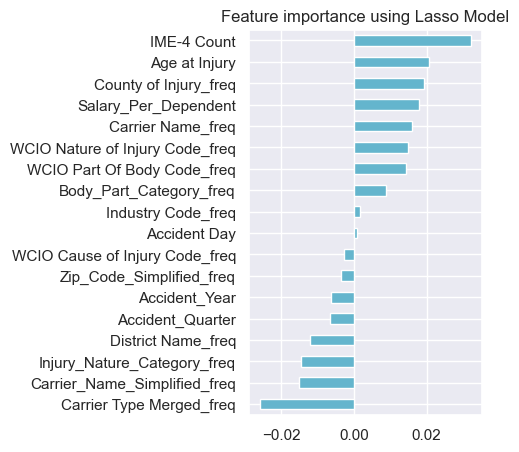

In [ ]:
plot_importance(coef,'Lasso')

 ### 4.2.2. Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_2_2"></a>

  [Back to 4.2. Numerical Features](#section_4_2)<br>
 

RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

The selected features after RFE likely overlap with those identified by LASSO, suggesting consistency in feature importance.
Using both LASSO and RFE provides a more robust feature selection by cross-validating the importance of individual features.

This block of code performs RFE to identify the best subset of features by iterating over a range of feature numbers. The code aims to maximize model performance on the validation set.

In [ ]:
# RFE using Logistic Regression
model = LogisticRegression()

#Use the function defined in utils.py
best_features, best_score, scores = find_optimal_features_with_rfe(
    model, 
    X_train_num_scaled, 
    y_train_encoded, 
    X_val_num_scaled, 
    y_val_encoded,
    max_features=19
)

Optimum number of features: 17
F1 Macro Score with 17 features: 0.436202



The loop evaluates models with 1 to 18 features, tracking the score for each.

The output indicates that 17 features yielded the highest validation f1_score score of 0.436202.

**Applying RFE with the Optimal Number of Features**

Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [ ]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 17)

In [ ]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train_encoded)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age at Injury                       True
IME-4 Count                         True
Accident_Quarter                    True
Accident_Year                       True
Accident Day                       False
Salary_Per_Dependent                True
Carrier_Name_Simplified_freq        True
Zip_Code_Simplified_freq            True
Industry Code_freq                  True
County of Injury_freq               True
District Name_freq                  True
WCIO Cause of Injury Code_freq      True
WCIO Nature of Injury Code_freq     True
WCIO Part Of Body Code_freq         True
Carrier Name_freq                   True
Body_Part_Category_freq             True
Injury_Nature_Category_freq         True
Carrier Type Merged_freq            True
dtype: bool

### 4.2.3. Feature Importance - Decision Tree <a class="anchor" id="sub_section_4_2_3"></a>
 [Back to 4.2. Numerical Features](#section_4_2)<br>



In [ ]:
from utils import compare_feature_importances

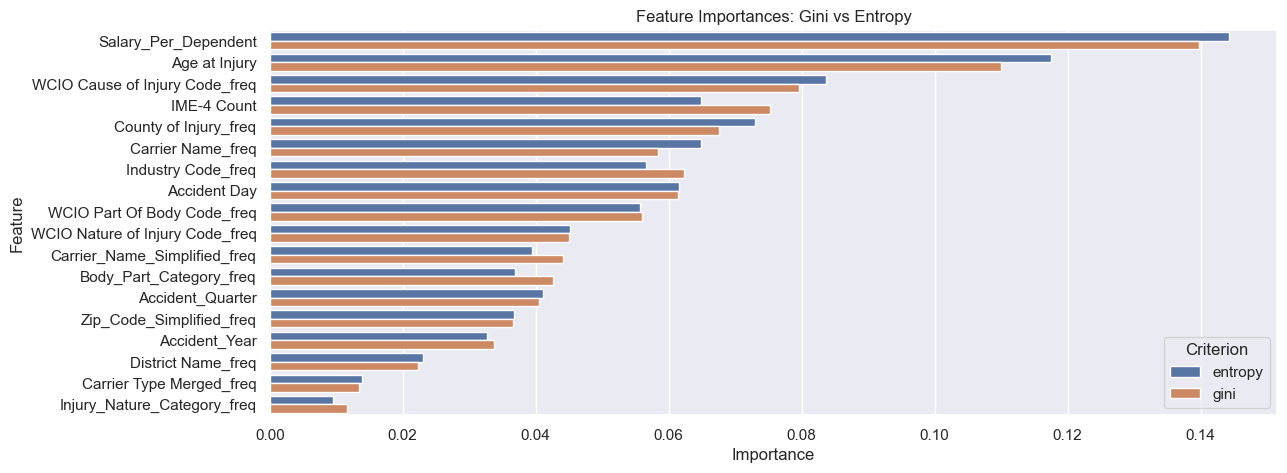

       gini   entropy               col
0  0.110028  0.117534     Age at Injury
1  0.075258  0.064800       IME-4 Count
2  0.040439  0.041146  Accident_Quarter
3  0.033763  0.032626     Accident_Year
4  0.061329  0.061480      Accident Day


In [ ]:
# Call the function with your training data
zippy = compare_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(zippy.head())

### 4.2.4. Feature Importance - Random Forest <a class="anchor" id="sub_section_4_2_4"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


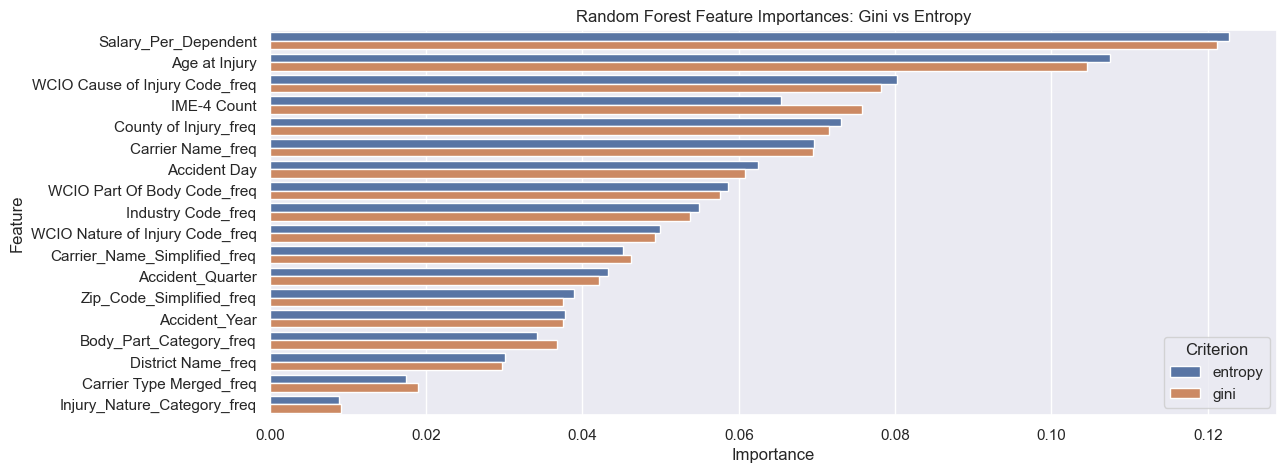

       gini   entropy               col
0  0.104548  0.107440     Age at Injury
1  0.075728  0.065405       IME-4 Count
2  0.042077  0.043309  Accident_Quarter
3  0.037564  0.037736     Accident_Year
4  0.060837  0.062431      Accident Day


In [ ]:
# Call the function with your training data
importances = compare_rf_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(importances.head())

## 4.3. Categorical Features</b> <a class="anchor" id="section_4_3"></a>
[Back to 4. Feature Selection](#chapter4)<br>

Chi-squared and MIC for the categorical ones.

In [ ]:
X_train_mic_chi2 = X_train[feature_categories['categorical'] + feature_categories['binary']]

In [ ]:
X_train_mic_chi2.shape

(459219, 11)

In [ ]:
X_train_mic_chi2.columns

Index(['Income_Category', 'Age Group', 'promptness_category',
       'promptness_C2_category', 'promptness_C3_category', 'Industry Risk',
       'Gender_M', 'Gender_U', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_UK'],
      dtype='object')

 ### 4.3.1. $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_3_1"></a>

[Back to 4.3. Categorical Features](#section_4_3)<br>


The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. 

In [ ]:
from utils import select_high_score_features_chi2_no_model

In [ ]:
# Example usage
high_score_features_chi2, scores = select_high_score_features_chi2_no_model(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6
)

Top 6 features based on Chi-square scores: ['promptness_C2_category', 'promptness_category', 'promptness_C3_category', 'Age Group', 'Income_Category', 'Gender_M']
Corresponding Chi-square scores: [3926.434088704915, 3561.501052874994, 3227.631195728296, 1354.5340717089923, 755.9224280930574, 542.3803735581471]


In [ ]:
high_score_features_chi2

['promptness_C2_category',
 'promptness_category',
 'promptness_C3_category',
 'Age Group',
 'Income_Category',
 'Gender_M']

 ### 4.3.2. Mutual Information Criterion (MIC) <a class="anchor" id="sub_section_4_3_2"></a>

 [Back to 4.3. Categorical Features](#section_4_3)<br>
 

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [ ]:
from utils import select_high_score_features_MIC

In [ ]:
# Example usage
high_score_features_MIC, scores_MIC = select_high_score_features_MIC(
    X_train_mic_chi2, 
    y_train_mapped, 
    threshold=6, 
    random_state=42)

Top 6 features based on MIC scores: ['promptness_C3_category', 'Industry Risk', 'Age Group', 'promptness_C2_category', 'Income_Category', 'Gender_M']
Corresponding MIC scores: [0.07182690168096895, 0.04322634506633838, 0.03306161693882226, 0.028891721670421644, 0.027583111239713576, 0.025194436216467997]


**Intersection of Selected Features by Chi-squared and MIC** <br>
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [ ]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(high_score_features_chi2).intersection(set(high_score_features_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['Age Group',
 'promptness_C2_category',
 'Income_Category',
 'Gender_M',
 'promptness_C3_category']

## 4.4. Final Features</b> <a class="anchor" id="section_4_4"></a>
[Back to 4. Feature Selection](#chapter4)<br>

The following table evaluates all numerical features using multiple feature selection techniques: Spearman Correlation, LASSO Regression, RFE, Decision Tree, and Random Forest. Based on these combined insights, a final decision is provided in the "What to do?" column.


| **Predictor**                 | **Spearman**                       | **LASSO**         | **RFE**            | **Decision Tree Importance**   | **Random Forest Importance**  | **What to do?**               |
|-------------------------------|------------------------------------|-------------------|--------------------|--------------------------------|--------------------------------|--------------------------------|
| Carrier Type Merged_freq      | Low                                | Keep              | Keep               | Low                            | Low                            | Discard                       |
| Carrier_Name_Simplified_freq  | Low                                | Keep              | Keep               | Low                            | Low                            | Discard                       |
| Injury_Nature_Category_freq   | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| District Name_freq            | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| Accident_Quarter              | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| Accident_Year                 | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| Zip_Code_Simplified_freq      | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| WCIO Cause of Injury Code_freq| Low                                | Discard           | Keep               | Keep                           | Keep                           | Include                       |
| Accident Day                  | Low                                | Discard           | Discard            | Keep                           | Low                            | Discard                       |
| Industry Code_freq            | Low                                | Discard           | Keep               | Keep                           | Low                            | Include                       |
| Body_Part_Category_freq       | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| WCIO Part Of Body Code_freq   | Low                                | Discard           | Keep               | Low                            | Low                            | Discard                       |
| WCIO Nature of Injury Code_freq| Low                               | Discard           | Keep               | Low                            | Low                            | Discard                       |
| Carrier Name_freq             | Moderate                          | Keep              | Keep               | Keep                           | Keep                           | Include                       |
| Salary_Per_Dependent          | Moderate                          | Keep              | Keep               | Keep                           | Keep                           | Include                       |
| County of Injury_freq         | Moderate                          | Keep              | Keep               | Keep                           | Keep                           | Include                       |
| Age at Injury                 | Moderate                          | Keep              | Keep               | Keep                           | Keep                           | Include                       |
| IME-4 Count                   | Moderate                          | Keep              | Keep               | Keep                           | Keep                           | Include                       |

### **Categorical Feature Selection Results**

The following table summarizes the decisions for each categorical feature based on **Mutual Information (MIC)** and **Chi-Squared** (X²) results. The retained features will be used in subsequent modeling to enhance predictive performance.

| **Feature**              | **X² Results**          | **MIC Results**         | **Decision**               |
|---------------------------|-------------------------|-------------------------|----------------------------|
| promptness_C2_category | Keep                  | Keep                  | Include               |
| promptness_category    | Keep                 | -                       | Consider include in model                |
| promptness_C3_category | Keep                       | Keep                  | Include                |
| Age Group              | Keep                  | Keep                  | Include                |
| Income_Category        | Keep                  | Keep                  | Include                |
| Industry Risk         |                        | Keep                  | Consider include in model                |
| Gender_M               | Keep                  | Keep                  | Include                |
| Gender_U               | -                       | -                       | Exclude          |
| Medical Fee Region_II  | -                       | -                       | Exclude               |
| Medical Fee Region_III | -                       | -                       | Exclude               |
| Medical Fee Region_UK  | -                       | -                       | Exclude                |


In [ ]:
numerical_features

['Age at Injury',
 'IME-4 Count',
 'Accident_Quarter',
 'Accident_Year',
 'Accident Day',
 'Salary_Per_Dependent',
 'Carrier_Name_Simplified_freq',
 'Zip_Code_Simplified_freq',
 'Industry Code_freq',
 'County of Injury_freq',
 'District Name_freq',
 'WCIO Cause of Injury Code_freq',
 'WCIO Nature of Injury Code_freq',
 'WCIO Part Of Body Code_freq',
 'Carrier Name_freq',
 'Body_Part_Category_freq',
 'Injury_Nature_Category_freq',
 'Carrier Type Merged_freq']

In [ ]:
final_features = [
    # Categorical features selected through MIC and chi2
    'Age Group','promptness_C2_category',
    'Income_Category','Gender_M', 'promptness_C3_category',
    # Important numerical features
    'Age at Injury', 'IME-4 Count','Salary_Per_Dependent','Industry Code_freq',
    'County of Injury_freq','WCIO Part Of Body Code_freq','WCIO Cause of Injury Code_freq',
    'Carrier Name_freq']


# Extracting the final features from the processed datasets
X_train_final = X_train[final_features]
X_val_final = X_val[final_features]
X_test_final = df_test[final_features]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

X_train_final shape: (459219, 13)
X_val_final shape: (114805, 13)
X_test_final shape: (387975, 13)


In [ ]:
len(y_train_encoded)

459219

In [ ]:
len(y_val_encoded)

114805

# 5. Modelling <a class="anchor" id="chapter5"></a>

[Back to ToC](#toc)<br>

For this binary classification task, we’ll use logistic regression as a simple and interpretable baseline. To capture non-linear patterns, we’ll include decision trees and random forests, which are robust and versatile. Additionally, we’ll apply gradient boosting methods like XGBoost or LightGBM for their strong performance on complex datasets. This mix of models balances simplicity and power for effective classification.

## 5.1. Logistic Regression </b> <a class="anchor" id="section_5_1"></a>

[Back to 5. Modelling ](#chapter5)<br>

Logistic Regression is a simple and interpretable model that is effective for binary classification when the relationship between features and the target is linear.


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.66      0.98      0.79    202442
4. TEMPORARY       0.46      0.04      0.07    103933

    accuracy                           0.66    306375
   macro avg       0.56      0.51      0.43    306375
weighted avg       0.59      0.66      0.55    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

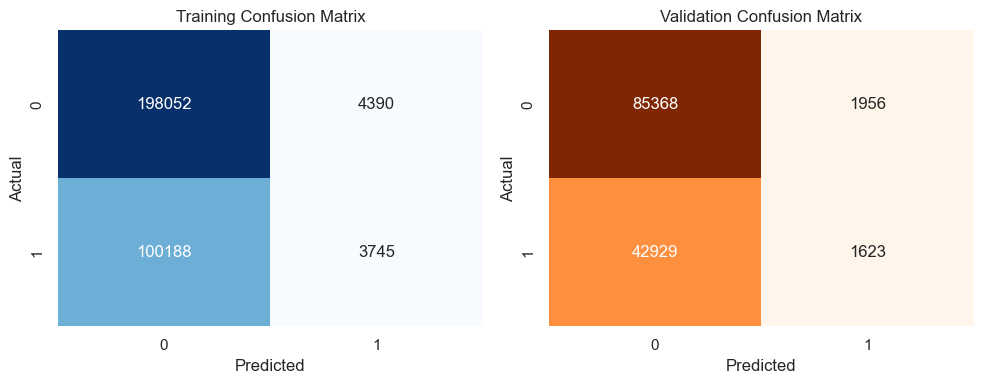

Time taken to run the cell: 39.03 seconds


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

# Record the start time
start_time = time.time()

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the train data
lr_model.fit(X_train_final, y_train_2_4)

# Predict the model for the train data
y_pred_lr_train = lr_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_lr = lr_model.predict(X_val_final)

#Print the classification report
metrics(y_train_2_4, y_pred_lr_train, y_val_2_4, y_pred_lr)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.2. Random Forest Trees</b> <a class="anchor" id="section_5_2"></a>
[Back to 5. Modelling ](#chapter5)<br>



___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       1.00      1.00      1.00    202442
4. TEMPORARY       1.00      1.00      1.00    103933

    accuracy                           1.00    306375
   macro avg       1.00      1.00      1.00    306375
weighted avg       1.00      1.00      1.00    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

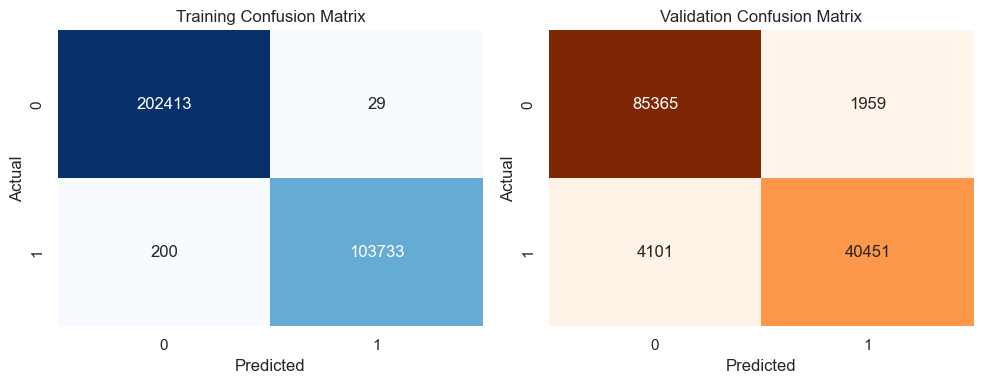

Time taken to run the cell: 140.98 seconds


In [243]:
# Record the start time
start_time = time.time()

#Initialize the model
rf_model = RandomForestClassifier(random_state=42)

#Fit the model to the train data
rf_model.fit(X_train_final, y_train_2_4)

#Predict the model for the train data
y_pred_rf_train = rf_model.predict(X_train_final)

#Predict the model for the validation data
y_pred_rf = rf_model.predict(X_val_final)

#Print the classification report
metrics(y_train_2_4, y_pred_rf_train, y_val_2_4, y_pred_rf)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.3. Decision Trees</b> <a class="anchor" id="section_5_3"></a>
[Back to 5. Modelling ](#chapter5)<br>


Decision Trees are versatile models that can capture non-linear patterns by splitting data based on feature values.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       1.00      1.00      1.00    202442
4. TEMPORARY       1.00      1.00      1.00    103933

    accuracy                           1.00    306375
   macro avg       1.00      1.00      1.00    306375
weighted avg       1.00      1.00      1.00    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

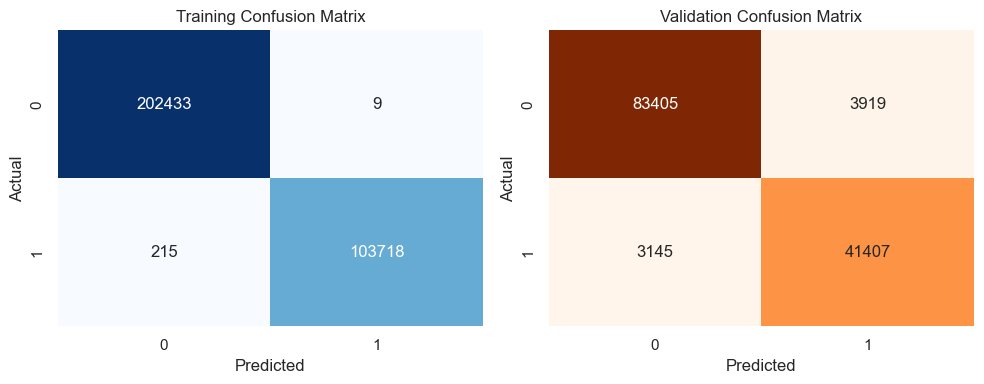

Time taken to run the cell: 31.81 seconds


In [244]:

from sklearn.tree import DecisionTreeClassifier
# Record the start time
start_time = time.time()

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the train data
dt_model.fit(X_train_final, y_train_2_4)

# Predict the model for the train data
y_pred_dt_train = dt_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_dt = dt_model.predict(X_val_final)

#Print the metric report
metrics(y_train_2_4, y_pred_dt_train, y_val_2_4, y_pred_dt)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


## 5.4. Gradient Boosting </b> <a class="anchor" id="section_5_4"></a>
[Back to 5. Modelling ](#chapter5)<br>


Gradient Boosting models (e.g., XGBoost, LightGBM) are powerful ensemble methods that iteratively improve performance by minimizing errors. <br>

**XGBClassifier**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    202442
           1       0.98      0.94      0.96    103933

    accuracy                           0.97    306375
   macro avg       0.98      0.97      0.97    306375
weighted avg       0.97      0.97      0.97    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

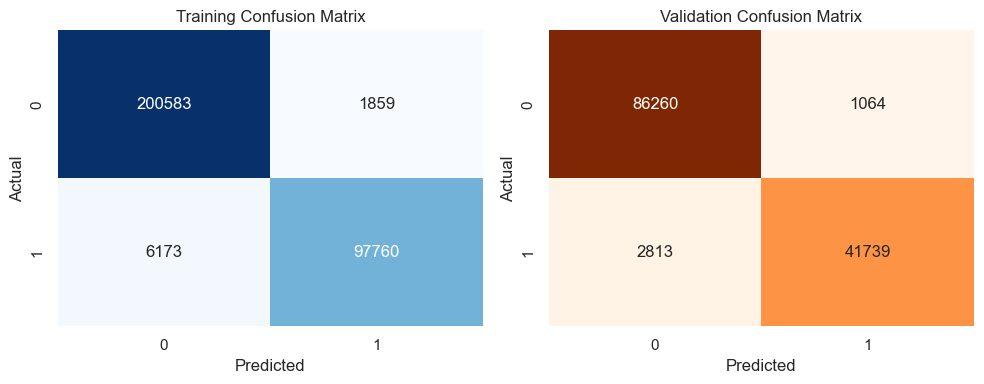

Time taken to run the cell: 3.39 seconds


In [245]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Record the start time
start_time = time.time()

# Encode the target variable
label_encoder = LabelEncoder()
y_train_2_4_encoded = label_encoder.fit_transform(y_train_2_4)
y_val_2_4_encoded = label_encoder.transform(y_val_2_4)

# Initialize the model
gb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the train data
gb_model.fit(X_train_final, y_train_2_4_encoded)

# Predict the model for the train data
y_pred_gb_train = gb_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_gb = gb_model.predict(X_val_final)

# Print the classification report
metrics(y_train_2_4_encoded, y_pred_gb_train, y_val_2_4_encoded, y_pred_gb)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


**CatBoost (CatBoostClassifier)** <br>
CatBoost is a gradient boosting framework designed to natively support categorical features. It is efficient, easy to implement, and often performs well on tabular data.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    202442
           1       0.98      0.95      0.97    103933

    accuracy                           0.98    306375
   macro avg       0.98      0.97      0.97    306375
weighted avg       0.98      0.98      0.98    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

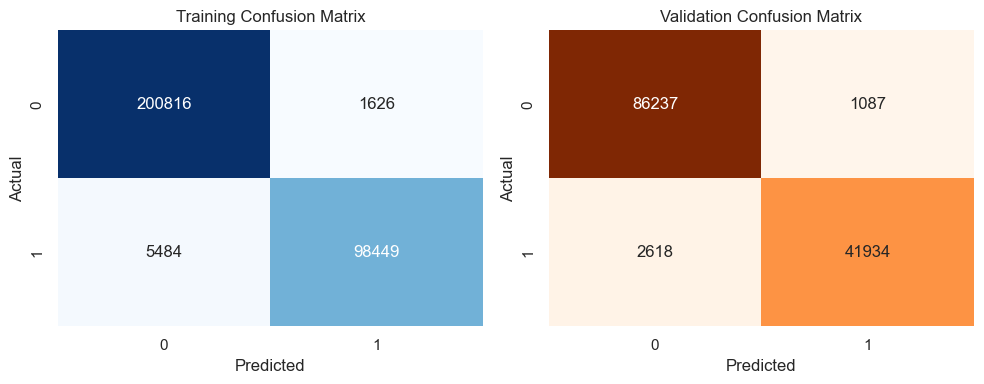

Time taken to run the cell: 39.59 seconds


In [246]:
from catboost import CatBoostClassifier
# Record the start time
start_time = time.time()

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs

# Fit the model to the training data
catboost_model.fit(X_train_final, y_train_2_4_encoded)

# Predict the model for the training data
y_pred_catboost_train = catboost_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_catboost = catboost_model.predict(X_val_final)

# Print the classification report
metrics(y_train_2_4_encoded, y_pred_catboost_train, y_val_2_4_encoded, y_pred_catboost)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.5. Summary of Models </b> <a class="anchor" id="section_5_5"></a>

[Back to 5. Modelling ](#chapter5)<br>



We focused on a select set of models for binary classification as the initial results provided promising performance metrics. Below is the performance table, including F1 scores for training and validation datasets, along with the time taken for each model to run.

| **Model**             | **F1 Score (Train)** | **F1 Score (Validation)** | **Time (seconds)** |
|------------------------|----------------------|----------------------------|---------------------|
| Logistic Regression    | 0.43                | 0.43                       | 35.77              |
| Random Forest          | 1.00                | 0.95                       | 144.97             |
| Decision Trees         | 1.00                | 0.94                       | 39.73              |
| XGBoost                | 0.97                | 0.97                       | 4.32               |
| CatBoost               | 0.97                | 0.97                       | 42.10              |

- **Logistic Regression**: Despite being simple and efficient, it showed lower F1 scores compared to other models.
- **Random Forest & Decision Trees**: Both achieved near-perfect training performance but showed slight overfitting on validation data.
- **XGBoost and CatBoost**: Achieved balanced F1 scores for both training and validation, with XGBoost being notably faster.

The ensemble methods, particularly XGBoost, exhibited strong performance with high F1 scores for both training and validation datasets, combined with efficient computation time. Due to its robustness and computational efficiency, we selected XGBoost as the primary model to apply to X_test_final.

For this evaluation, we will focus on the majority class (y_test == 1) while retaining the original output labels (using inverse label encoding). Additionally, we will count instances of NaN values for the minority classes (y_test == 2 and y_test == 4) to provide a comprehensive view of the test dataset distribution.

# 6. Loading the Results <a class="anchor" id="chapter6"></a>
[Back to ToC](#toc)<br>

In [247]:
# Filter the test data where y_test == 1
X_test_filtered = X_test_final.loc[y_test[y_test == 1].index]

# Remove non-numeric columns (like 'Final_Predictions') before prediction
X_test_filtered_numeric = X_test_filtered.select_dtypes(include=['int', 'float', 'bool', 'category'])

# Apply the model to predict on the filtered numeric test data
y_pred_test_filtered = gb_model.predict(X_test_filtered_numeric)

# Inverse transform the predictions to the original labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train_2_4)  # Use the encoder already fitted on training data
y_pred_test_original_filtered = label_encoder.inverse_transform(y_pred_test_filtered)

# Add the predictions back to the original test dataset
X_test_final.loc[y_test[y_test == 1].index, 'Pred_notebook_5'] = y_pred_test_original_filtered

# Count the occurrences of each class in the filtered test predictions
class_counts_filtered = pd.Series(y_pred_test_original_filtered).value_counts()

# Display results
print("Predicted Class Counts (Original Labels) for y_test == 1:")
print(class_counts_filtered)


Predicted Class Counts (Original Labels) for y_test == 1:
4. TEMPORARY    212961
2. NON-COMP         44
dtype: int64


In [253]:
# Ensure the index alignment before assigning
df_test['Pred_notebook_5'] = X_test_final.loc[df_test.index, 'Pred_notebook_5']

# Save the updated DataFrame to a file
df_test.to_csv('../Data_Temporary/df_test_predictions_not5.csv', index=True)